In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings

warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train_copy = train.copy()
test_copy = test.copy()

In [4]:
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [5]:
train.City_Code.unique()

array(['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'], dtype=object)

In [8]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()
train_copy['Region_Code_Encoded'] = encoder.fit_transform(train_copy['Region_Code'], train_copy['Response'])



In [9]:
train_copy

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Region_Code_Encoded
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0,3213
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0,1117
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1,3732
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0,4378
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0,2190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0,845
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0,4188
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0,442
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1,4


In [18]:
import category_encoders as ce

encoder_regioncode = ce.HashingEncoder(n_components=10, cols=['Region_Code'])
train_copy = encoder_regioncode.fit_transform(train_copy)

In [19]:
train_copy.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'ID', 'City_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [21]:
test_copy = encoder_regioncode.fit_transform(test_copy)

In [22]:
test_copy.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'ID', 'City_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium'],
      dtype='object')

In [23]:
train_copy

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,0,0,0,1,0,0,0,0,0,0,...,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,0,0,0,0,1,0,0,0,0,0,...,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,0,0,0,0,0,0,1,0,0,0,...,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,0,0,0,0,0,0,0,1,0,0,...,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,0,0,0,0,0,0,0,0,1,0,...,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,1,0,0,0,0,0,0,0,0,0,...,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,1,0,0,0,0,0,0,0,0,0,...,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,0,0,0,0,0,0,0,1,0,0,...,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,1,0,0,0,0,0,0,0,0,0,...,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [24]:
train_copy['Health Indicator'] = train_copy['Health Indicator'].fillna('X10')
test_copy['Health Indicator'] = test_copy['Health Indicator'].fillna('X10')

In [29]:
train_copy.Holding_Policy_Duration = train_copy.Holding_Policy_Duration.fillna('0')
test_copy.Holding_Policy_Duration = test_copy.Holding_Policy_Duration.fillna('0')

train_copy.Holding_Policy_Type = train_copy.Holding_Policy_Type.fillna(5.0)
test_copy.Holding_Policy_Type = test_copy.Holding_Policy_Type.fillna(5.0)



In [30]:
train_copy.isnull().sum()

col_0                      0
col_1                      0
col_2                      0
col_3                      0
col_4                      0
col_5                      0
col_6                      0
col_7                      0
col_8                      0
col_9                      0
ID                         0
City_Code                  0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [31]:
test_copy.isnull().sum()

col_0                      0
col_1                      0
col_2                      0
col_3                      0
col_4                      0
col_5                      0
col_6                      0
col_7                      0
col_8                      0
col_9                      0
ID                         0
City_Code                  0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [32]:
train_copy

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,0,0,0,1,0,0,0,0,0,0,...,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,0,0,0,0,1,0,0,0,0,0,...,Joint,75,22,No,X2,0,5.0,22,30510.0,0
2,0,0,0,0,0,0,1,0,0,0,...,Individual,32,32,No,X10,1.0,1.0,19,7450.0,1
3,0,0,0,0,0,0,0,1,0,0,...,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,0,0,0,0,0,0,0,0,1,0,...,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,1,0,0,0,0,0,0,0,0,0,...,Individual,22,22,No,X3,0,5.0,18,7704.0,0
50878,1,0,0,0,0,0,0,0,0,0,...,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,0,0,0,0,0,0,0,1,0,0,...,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,1,0,0,0,0,0,0,0,0,0,...,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [48]:
X = train_copy.drop(['ID','Response','Lower_Age'],1)
y = train_copy.Response

In [49]:
X.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'City_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium'],
      dtype='object')

In [54]:
X = pd.get_dummies(X,columns=['City_Code', 'Accomodation_Type','Reco_Insurance_Type','Is_Spouse', 'Health Indicator',
                    'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat'])

In [55]:
X

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50878,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50879,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
50880,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [58]:
test_copy = pd.get_dummies(test_copy, columns=['City_Code', 'Accomodation_Type','Reco_Insurance_Type','Is_Spouse', 'Health Indicator',
                    'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat'])
test_copy.shape

(21805, 109)

In [59]:
test_copy = test_copy.drop(['ID','Lower_Age'],1)
test_copy

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21801,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21802,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21803,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
X

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50878,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50879,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
50880,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled= sc.fit_transform(X)


In [104]:
test_copy_scaled = sc.fit_transform(test_copy)

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
lr = LogisticRegression().fit(X_train, y_train)
#roc_auc_score(y, clf.predict_proba(X)[:, 1])



In [75]:
pred = lr.predict(X_test)
#roc_auc_score(y_test,pred)
roc_auc_score(y_test, pred, average=None)

0.5044427794510208

In [76]:
from sklearn.metrics import accuracy_score
pred = lr.predict(X_test)
accuracy_score(y_test,pred)

0.7608254176220112

In [77]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [78]:
pred = decision_tree.predict(X_test)
roc_auc_score(y_test, pred, average=None)

0.5425741576144434

In [79]:
accuracy_score(y_test,pred)

0.662626924336718

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
                                       
random_forest.fit(X_train, y_train)
pred = random_forest.predict(X_test)
accuracy_score(y_test,pred)

0.7525712414018998

In [81]:
roc_auc_score(y_test, pred, average=None)

0.5213979416971353

In [82]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(1,200,20),'criterion':('gini','entropy'),'max_depth':range(2,11)}
gs = GridSearchCV(random_forest, parameters)
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': range(2, 11),
                         'n_estimators': range(1, 200, 20)})

In [83]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 21}

In [84]:
gs.best_score_

0.760002259960399

In [85]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion= 'entropy', max_depth= 10, n_estimators= 21)
                                       
random_forest.fit(X_train, y_train)
pred = random_forest.predict(X_test)
accuracy_score(y_test,pred)

0.7606943989518506

In [86]:
roc_auc_score(y_test, pred, average=None)

0.5001876297955455

In [87]:
test_pred = random_forest.predict(test_copy)

In [88]:
sub = pd.read_csv('sample_submission.csv')

sub['ID'] = test.ID
sub['Response'] = test_pred

sub.to_csv('predictions_dt_2:24.csv',index=False)

In [108]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1.0))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0.0))) 
  

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 8526
Before OverSampling, counts of label '0': 27091 



NameError: name 'X_train_scaled' is not defined

In [90]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)

In [91]:
roc_auc_score(y_test, predictions, average=None)

0.5094474277767913

In [92]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [93]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
                                       
random_forest.fit(X_train_res, y_train_res.ravel()) 
pred = random_forest.predict(X_test)
accuracy_score(y_test,pred)

0.7454962332132329

In [94]:
roc_auc_score(y_test, pred, average=None)

0.5116815755226075

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1.0))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0.0))) 
  

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 8526
Before OverSampling, counts of label '0': 27091 

After OverSampling, the shape of train_X: (54182, 107)
After OverSampling, the shape of train_y: (54182,) 

After OverSampling, counts of label '1': 27091
After OverSampling, counts of label '0': 27091


In [96]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train_res, y_train_res.ravel()) 

DecisionTreeClassifier(random_state=0)

In [97]:
pred = decision_tree.predict(X_test)
roc_auc_score(y_test, pred, average=None)

0.5397659034708564

In [105]:
test_pred = decision_tree.predict(test_copy_scaled)

In [100]:
sub = pd.read_csv('sample_submission.csv')

sub['ID'] = test.ID
sub['Response'] = test_pred

sub.to_csv('predictions_dt23.csv',index=False)

In [106]:
test_pred

array([1, 1, 1, ..., 0, 1, 1])

In [107]:
pd.DataFrame(test_pred).value_counts()

1    19518
0     2287
dtype: int64

In [103]:
pred

array([0, 0, 0, ..., 1, 0, 0])

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1.0))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0.0))) 
  

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 8550
Before OverSampling, counts of label '0': 27067 

After OverSampling, the shape of train_X: (54134, 107)
After OverSampling, the shape of train_y: (54134,) 

After OverSampling, counts of label '1': 27067
After OverSampling, counts of label '0': 27067


In [110]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
                                       
random_forest.fit(X_train_res, y_train_res.ravel()) 
pred = random_forest.predict(X_test)
accuracy_score(y_test,pred)

0.7436619718309859

In [111]:
roc_auc_score(y_test, pred, average=None)

0.5181570920828287

In [112]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(1,200,20),'criterion':('gini','entropy'),'max_depth':range(2,11)}
gs = GridSearchCV(random_forest, parameters)
gs.fit(X_train_res, y_train_res.ravel())

KeyboardInterrupt: 

In [113]:
X

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50878,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50879,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
50880,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [115]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
                                       
random_forest.fit(X_train_res, y_train_res.ravel()) 
pred = random_forest.predict(X_test)
#accuracy_score(y_test,pred)

In [116]:
roc_auc_score(y_test, pred, average=None)

0.6144491236521035

In [118]:
pred = random_forest.predict(test_copy)

In [119]:
sub = pd.read_csv('sample_submission.csv')

sub['ID'] = test.ID
sub['Response'] = pred

sub.to_csv('predictions_rf_roc.csv',index=False)

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)


from sklearn.ensemble import RandomForestRegressor
random_forest1 = RandomForestRegressor()
                                       
random_forest1.fit(X_train, y_train) 
pred = random_forest1.predict(X_test)
roc_auc_score(y_test, pred, average=None)

0.6512355017038295

In [121]:
pred

array([0.41, 0.35, 0.3 , ..., 0.26, 0.36, 0.23])

<AxesSubplot:ylabel='Density'>

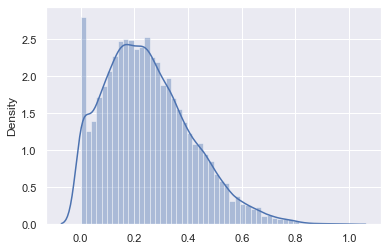

In [122]:
sns.distplot(pred)

In [128]:
test_pred = random_forest1.predict(test_copy)

In [132]:
sub = pd.read_csv('sample_submission.csv')

sub['ID'] = test.ID
sub['Response'] = test_pred

sub.to_csv('predictions_rf_roc2.csv',index=False)

<AxesSubplot:ylabel='Density'>

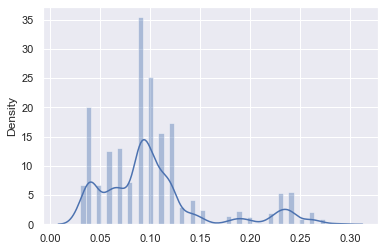

In [133]:
sns.distplot(test_pred)

In [134]:
test_pred

array([0.06, 0.08, 0.07, ..., 0.09, 0.04, 0.12])

In [136]:
X_scaled

array([[-0.34556828, -0.32996746, -0.32960115, ..., -0.25806354,
        -0.33110146,  2.58979892],
       [-0.34556828, -0.32996746, -0.32960115, ..., -0.25806354,
        -0.33110146,  2.58979892],
       [-0.34556828, -0.32996746, -0.32960115, ..., -0.25806354,
        -0.33110146, -0.38613036],
       ...,
       [-0.34556828, -0.32996746, -0.32960115, ..., -0.25806354,
        -0.33110146, -0.38613036],
       [ 2.89378415, -0.32996746, -0.32960115, ..., -0.25806354,
        -0.33110146, -0.38613036],
       [-0.34556828, -0.32996746, -0.32960115, ..., -0.25806354,
        -0.33110146, -0.38613036]])

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
roc_auc_score(y_test, pred, average=None)

0.5071237849742054

In [139]:
test_pred = clf.predict_proba(test_copy_scaled)[:,1]

<AxesSubplot:ylabel='Density'>

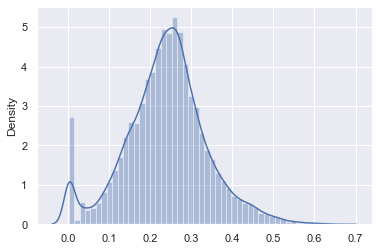

In [140]:
sns.distplot(test_pred)

In [141]:
sub = pd.read_csv('sample_submission.csv')

sub['ID'] = test.ID
sub['Response'] = test_pred

sub.to_csv('predictions_lgbm.csv',index=False)

In [142]:
X

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50878,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50879,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
50880,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
